### 

###
$$
    \bf{\Large\text{Постановка задачи}\normalsize}
$$


На подвижной поверхности находится n-ное количество метрономов. Необходимо определить частоту синхронизации, фазу синхронизации, также построить графики зависимостей $ \omega(t), \varphi(t) $

В данной системе за основы мы возьмем модель Курамото, которая описывает синхронизацию систем:

$$
\frac{d\varphi_i}{dt} = \omega_i + \sum_{j = 0}^{n} K_{ij}\sin{(\varphi_j-\varphi_i)}
$$

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
import timeit
import solver as sl1
import solver2 as sl2
from PIL import Image
from PIL import ImageDraw

In [40]:
ImageResolution = (512,512)
ImageColorSpace = "RGB"

r = 1
Colors = [
'green',
'red',
'blue',
'black',
'yellow',
'orange',
'purple'
]

resolution = 10**(-2)
duration = 5e0
omegas = [2.0,2.0,2.0,2.0,2.0,2.0,2.0]
phis = [np.pi,np.pi*0.75,np.pi*0.5,np.pi*0.25, np.pi*0, np.pi*1.25, np.pi*1.5]
# k_arr = [[-1.0,-1.0],
#          [-1.0,-1.0]]
k_arr = [[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]]





100%|██████████| 500/500 [00:00<00:00, 1326.37it/s]




100%|██████████| 500/500 [00:00<00:00, 1058.39it/s]




100%|██████████| 500/500 [00:00<00:00, 930.55it/s]






100%|██████████| 500/500 [00:00<00:00, 966.64it/s] 



100%|██████████| 500/500 [00:00<00:00, 2117.49it/s]



100%|██████████| 500/500 [00:00<00:00, 1792.19it/s]



100%|██████████| 500/500 [00:00<00:00, 1720.93it/s]



100%|██████████| 500/500 [00:00<00:00, 1979.08it/s]



100%|██████████| 500/500 [00:00<00:00, 1769.51it/s]



100%|██████████| 500/500 [00:00<00:00, 1749.56it/s]



100%|██████████| 511/511 [00:00<00:00, 1947.03it/s]



100%|██████████| 511/511 [00:00<00:00, 1684.31it/s]



100%|██████████| 511/511 [00:00<00:00, 2012.18it/s]



100%|██████████| 511/511 [00:00<00:00, 1606.79it/s]




100%|██████████| 511/511 [00:00<00:00, 1182.42it/s]






100%|██████████| 511/511 [00:00<00:00, 796.92it/s]





100%|██████████| 511/511 [00:00<00:00, 1101.25it/s]



100%|██████████| 511/511 [00:00<00:00, 2050.76it/s]


TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

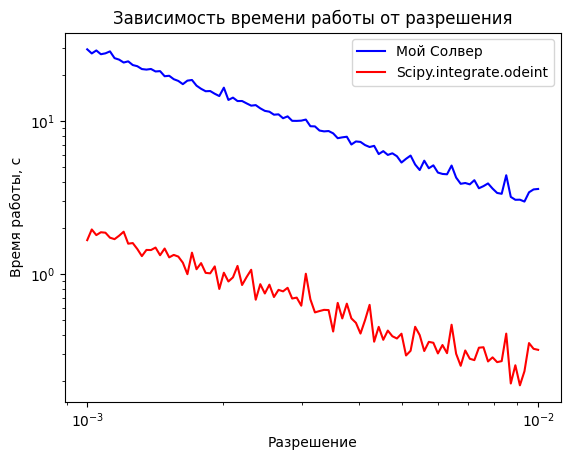

In [41]:
Y1_data = []
Y2_data = []
duration2 = []
Resolution = np.logspace(-2, -3, 100)
for resolution in tqdm(Resolution):
    Y1_data.append(timeit.timeit(lambda: sl1.Integrator(resolution, duration, omegas, phis, k_arr), number = 10))
    Y2_data.append(timeit.timeit(lambda: sl2.Integrator(resolution, duration, omegas, phis, k_arr), number = 10))
    duration2.append(resolution)
plt.plot(duration2, Y1_data, color="blue", label = "Мой Солвер")
plt.plot(duration2, Y2_data, color="red", label = "Scipy.integrate.odeint")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Разрешение")
plt.ylabel("Время работы, с")
plt.title("Зависимость времени работы от разрешения")
plt.legend()
plt.savefig()

In [ ]:
timeit.timeit(lambda: sl2.Integrator(resolution, duration, omegas, phis, k_arr), number = 100)

1.161488499987172

In [ ]:
TimeAxis, Phi_Axis, Omega_Axis = sl2.Integrator(resolution, duration, omegas, phis, k_arr)

In [ ]:
n = len(Phi_Axis[0])

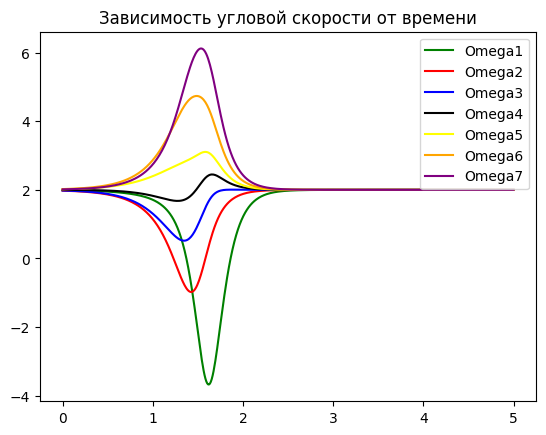

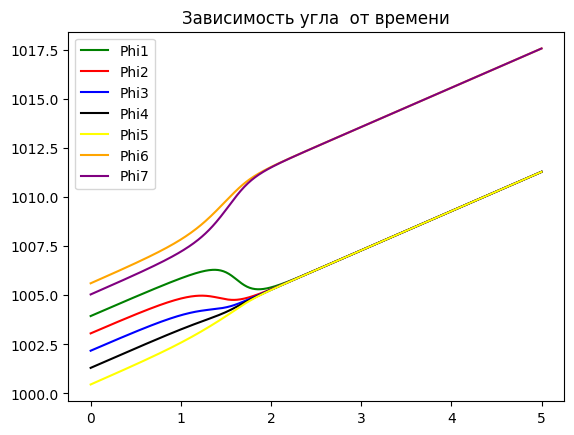

In [ ]:

for i,OM in enumerate(Omega_Axis):
    plt.plot(TimeAxis,OM, color = Colors[i], label = str("Omega" + str(i+1)))
plt.title("Зависимость угловой скорости от времени")
plt.legend()
plt.savefig('Omegas.pdf')
plt.show()
#Phi_Axis = np.sin(Phi_Axis)
#TimeAxis = np.sin(TimeAxis)
for i,OM in enumerate(Phi_Axis):
    plt.plot(TimeAxis,OM, color = Colors[i], label = str("Phi" + str(i+1)))
plt.title("Зависимость угла  от времени")
plt.legend()
plt.savefig('Phis.pdf')
plt.show()

In [ ]:

My_Image = Image.new(ImageColorSpace, ImageResolution)

[(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), (0.4310957324106113, 0.07086505190311418, 0.4310957324106113, 1.0), (0.3582622068435217, 0.14369857747020376, 0.3582622068435217, 1.0), (0.2873971549404075, 0.21456362937331794, 0.2873971549404075, 1.0), (0.21456362937331797, 0.2873971549404075, 0.21456362937331797, 1.0), (0.14369857747020376, 0.3582622068435217, 0.14369857747020376, 1.0), (0.0708650519031142, 0.4310957324106113, 0.0708650519031142, 1.0)]


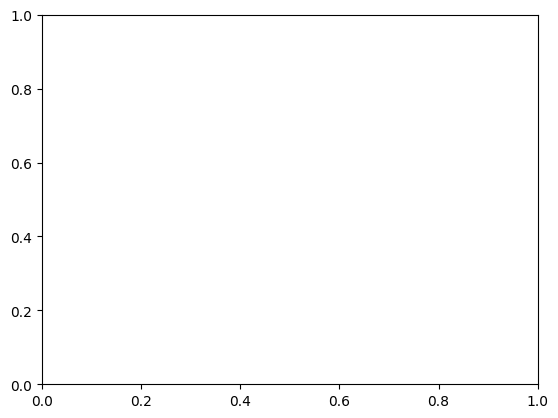

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
COLORS = ['purple', 'green']
cmap = LinearSegmentedColormap.from_list('custom', COLORS)
Colors = [cmap(i/len(Phi_Axis)) for i in range(len(Phi_Axis))]
print(Colors)
figure, axes = plt.subplots()

def frame (i):
    axes.clear()

    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_xlim(-r * 10.1, r*10.1)
    axes.set_ylim(-r * 2.0, r*2.0)
    axes.set_aspect(1)
    axes.plot((-10.1,10.1),(0.5,0.5), color = 'black')
     
    for j, phi in enumerate(Phi_Axis[1:]):
        x = np.sin(phi[i]) + j*2 -5
        y = 0.5*np.ones_like(x)
        axes.plot(x, y, marker = 'o', color = Colors[j], markersize = 15, zorder = 10)


In [ ]:
frames_numbers = np.arange(n)
anime = FuncAnimation(figure, frame, frames = tqdm(frames_numbers[::2]), interval  = 20 )
anime.save('Metronomes.gif') 
display(anime)

 99%|█████████▉| 248/250 [00:04<00:00, 60.16it/s]

 99%|█████████▉| 248/250 [00:23<00:00, 60.16it/s]